# 🌧️ HK Rainfall Visualiser — 檔案總覽（繁體中文）

---

## 主要程式與說明

### `Main.py`
- 主程式入口。實作 Pygame 使用者介面、控制按鈕、動畫主迴圈、音訊播放，並處理開啟外部降雨圖表檢視器。


### `README.md`
- 專案自述檔，包含簡短執行步驟、封裝說明與致謝。


### `readme.ipynb`
- 這個 Jupyter 筆記本（您目前檢視的檔案），包含專案摘要與一個可用來預覽產生之降雨圖 PNG 的小工具範例。


### `requirements.txt`
- 執行 `Main.py` 所需的最少 Python 依賴（版本已鎖定）。開發或打包所需的套件請放在開發需求檔或以註解保留。


## 資料與資源

### `data/`
- 資料資料夾，包含 `monthlyElement.xml` 與應用程式使用的其他資料檔案。


### `image/`
- 圖像與音訊資產（按鈕圖示、雨聲檔案等，雨聲已重新命名為 `rain_sound_image.mp3`）。


### `rainfall_charts/`
- 由視覺化或產生腳本產生的逐年降雨 PNG 圖檔（例如 `rainfall_1884.png`），供程式載入與顯示。


## 工具腳本

### `downloadchart.py`
- 輔助腳本，用來下載或產生外部圖表 PNG，通常在準備圖表或打包時使用。


### `viewchart.py`
- 用來開啟單年度降雨圖 PNG 的外部檢視器，並可選擇將產生的圖表儲存到磁碟。


### `saveallcharts.py`
- 批次腳本，用於產生並儲存所有年度圖到 `rainfall_charts/`。


### `scraping_utils.py`
- 從香港天文台（HKO）抓取/下載資料的工具函式，協助在本地建立或更新 `monthlyElement.xml`。


### `xmldata.py`
- XML 解析輔助程式，負責讀取 `monthlyElement.xml` 並回傳視覺化器使用的結構化資料。


## 開發與測試

### `Viusalizedatatest.py`
- 開發期間使用的測試/實驗腳本（檔名有小拼字錯誤，保留原名）。


### `animationtest.py`
- 測試動畫效果與時間控制的小型實驗程式，用於開發 UI 時的驗證。


## 打包與清單

### `package_files.txt`
- 打包時的檔案清單，指定要包含於可發行版的執行時資源（由打包腳本使用）。


## 儲存庫資料與快取

### `__pycache__/`
- Python 的 bytecode 快取目錄（通常應該加入 `.gitignore` 並避免提交）。


### `.git/`
- Git 儲存庫的內部資料與歷史記錄。


---

如需我把此繁體中文說明也寫回每個 Python 檔案的檔頭，或在每個檔案上方加入一行指向此筆記本的註解（例如「參見 readme.ipynb - 檔案總覽」），請告訴我，我會僅修改 `readme.ipynb` 或僅修改您指定的檔案（不會新增其他檔案）。

## 網頁示範 / Demo

已將動畫移植為瀏覽器示範並放在 `docs/index.html`（可搭配 GitHub Pages 發佈）。您可以在本地打開 `docs/index.html` 或等待 Pages 建置完成後透過公開網址檢視。

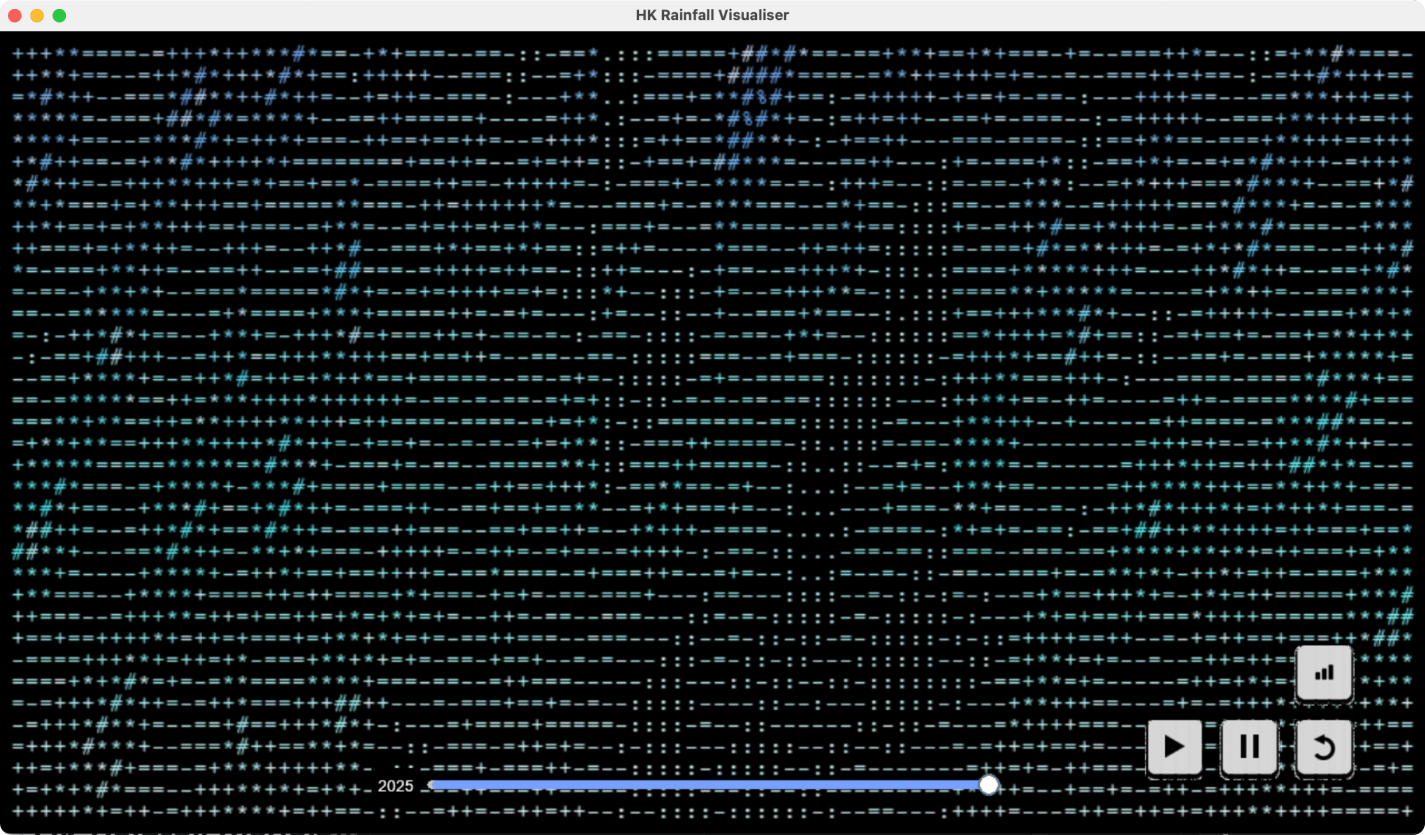 

https://janet-chengyutung.github.io/HK-rainfall-visualiser-/ 

In [ ]:
from pathlib import Path
from IPython.display import display, Image
import ipywidgets as widgets
from PIL import Image as PILImage

BASE = Path(__file__).parent
CHART_DIR = BASE
pngs = sorted([p for p in CHART_DIR.glob('rainfall_*.png')])
pngs = [str(p) for p in pngs]
len(pngs)

In [ ]:
if not pngs:
    print('No rainfall_*.png files found in', CHART_DIR)
else:
    dd = widgets.Dropdown(options=pngs, description='Chart:')
    out = widgets.Output()

    def show_chart(change):
        out.clear_output()
        p = change['new']
        if p is None:
            return
        with out:
            display(Image(filename=p))

    dd.observe(show_chart, names='value')
    display(dd, out)
    # show first by default
    dd.value = pngs[0]